**ROGER KEWIN SAMSON**



**A20563057**

**CS512 - HW 3 - "1 PART" :**



## 1.1 - GenerateGenerating Line Segment Points


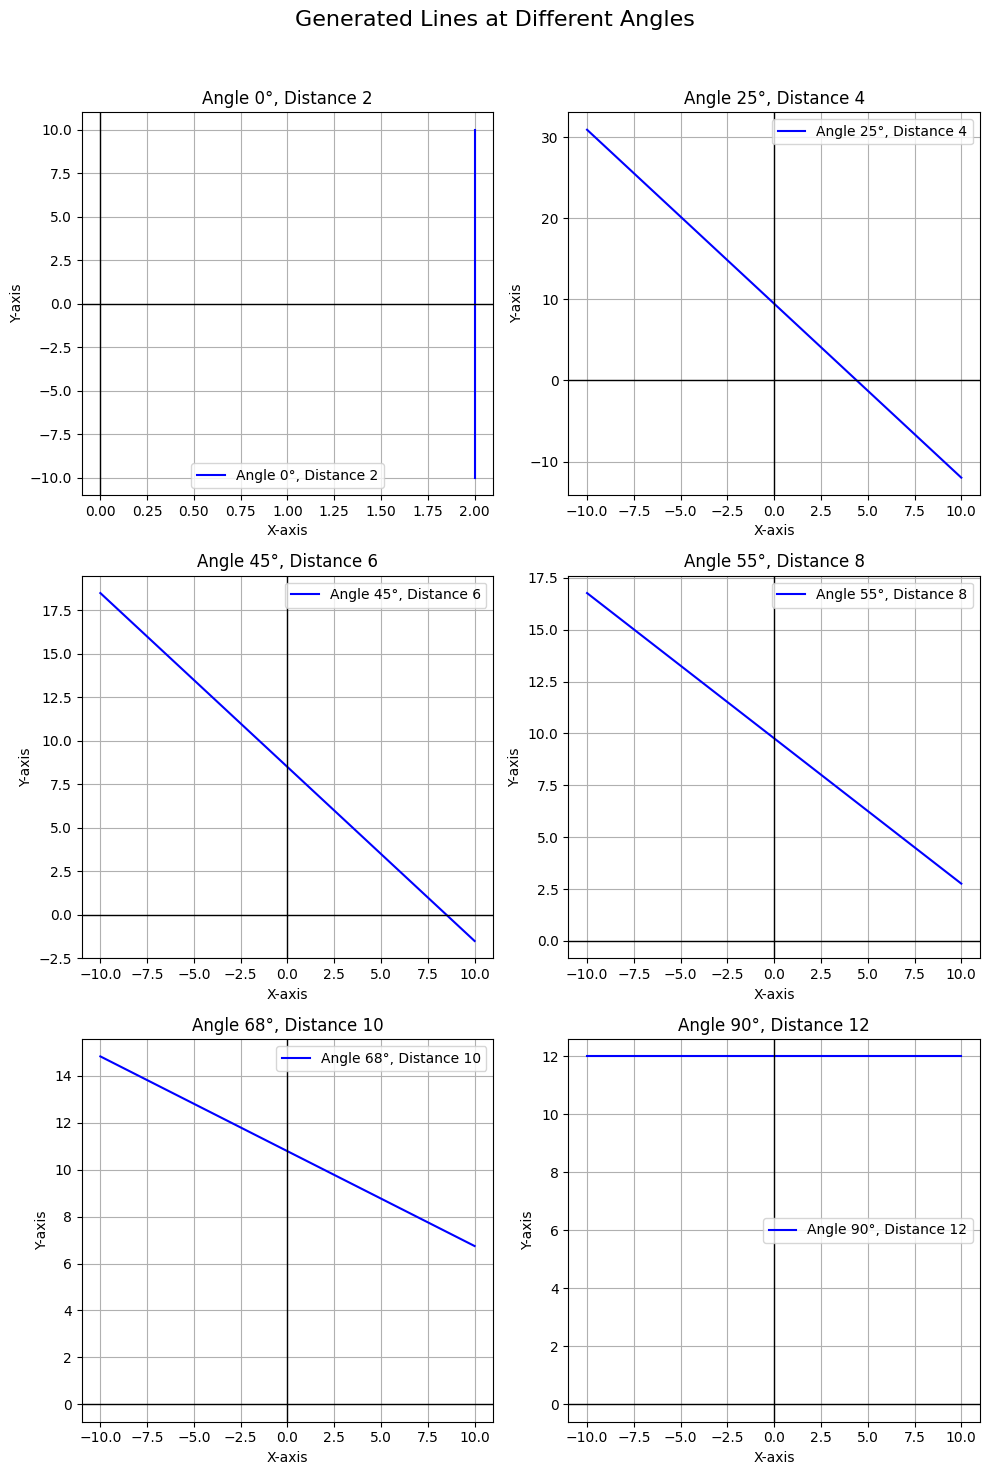

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_line_points(angle_degrees, distance, num_points=100, x_range=(-10, 10)):
    angle_radians = np.radians(angle_degrees)  # Convert angle to radians
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)

    x_values = np.linspace(x_range[0], x_range[1], num_points)
    if np.isclose(sin_theta, 0):  
        x_values = np.full(num_points, distance)  # Make x constant for vertical lines
        y_values = np.linspace(x_range[0], x_range[1], num_points)
    else:
        y_values = (distance - x_values * cos_theta) / sin_theta  # Solve for y

    return x_values, y_values

angles = [0, 25, 45, 55,  68 , 90]
distances = [2, 4, 6, 8, 10, 12]  

num_angles = len(angles)
cols = 2  
rows = int(np.ceil(num_angles / cols))  

fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 5))  # Create subplots
fig.suptitle("Generated Lines at Different Angles", fontsize=16)
axes = axes.flatten() if num_angles > 1 else [axes]  

for i, (angle, distance) in enumerate(zip(angles, distances)): 
    x_vals, y_vals = generate_line_points(angle, distance)  # Pass a single distance at a time
    axes[i].plot(x_vals, y_vals, label=f"Angle {angle}°, Distance {distance}", color='b')
    axes[i].axhline(0, color='black', linewidth=1)
    axes[i].axvline(0, color='black', linewidth=1)
    axes[i].set_xlabel("X-axis")
    axes[i].set_ylabel("Y-axis")
    axes[i].set_title(f"Angle {angle}°, Distance {distance}")
    axes[i].legend()
    axes[i].grid()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 1.2 ADDING GAUSSIAN NOISE

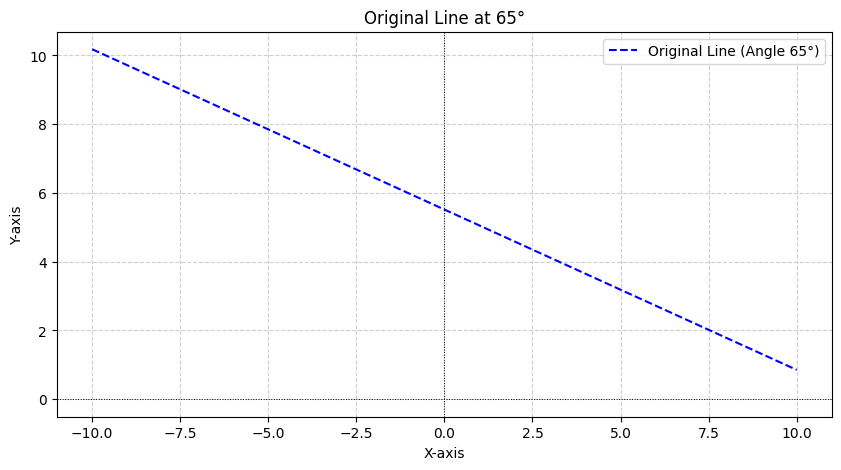

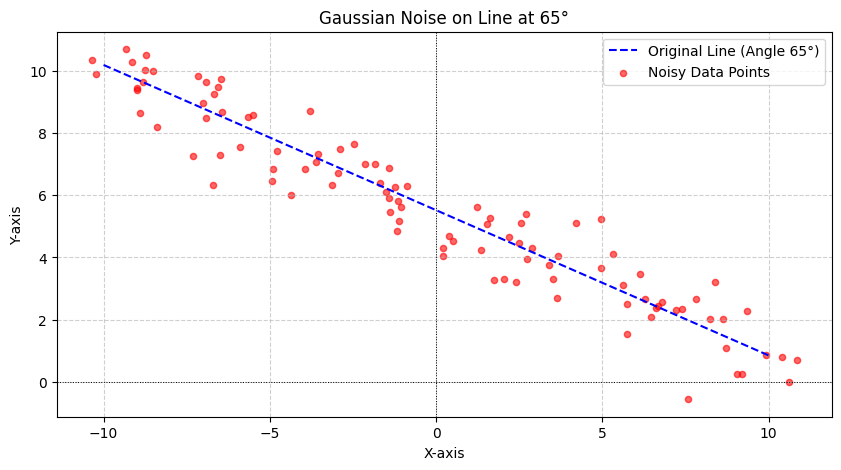

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_line(angle_degrees, distance, num_points=100, x_range=(-10, 10)):
   
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)

    x_values = np.linspace(x_range[0], x_range[1], num_points)

    if np.isclose(sin_theta, 0):
        x_values = np.full(num_points, distance)  # All x values are constant
        y_values = np.linspace(x_range[0], x_range[1], num_points)
    else:
        y_values = (distance - x_values * cos_theta) / sin_theta  # Solve for y

    return x_values, y_values

def add_gaussian_noise(x_points, y_points, angle, mean=0, std_dev=0.6):
    if np.isclose(angle % 180, 90):  
        x_noise = np.zeros_like(x_points)  # No noise in x
        y_noise = np.random.normal(mean, std_dev, size=y_points.shape)  # Noise only in y
    else:
        x_noise = np.random.normal(mean, std_dev, size=x_points.shape)
        y_noise = np.random.normal(mean, std_dev, size=y_points.shape)
    
    return x_points + x_noise, y_points + y_noise

# Set the angle and distance
angle = 65  
distance = 5 
x_vals, y_vals = generate_line(angle, distance)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label=f'Original Line (Angle {angle}°)', color='blue', linestyle='dashed')
plt.axhline(0, color='black', linewidth=0.7, linestyle='dotted')
plt.axvline(0, color='black', linewidth=0.7, linestyle='dotted')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title(f"Original Line at {angle}°")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

noise_mean = 0  
noise_std_dev = 0.8  
noisy_x_vals, noisy_y_vals = add_gaussian_noise(x_vals, y_vals, angle, mean=noise_mean, std_dev=noise_std_dev)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label=f'Original Line (Angle {angle}°)', color='blue', linestyle='dashed')
plt.scatter(noisy_x_vals, noisy_y_vals, label='Noisy Data Points', color='red', s=20, alpha=0.6)
plt.axhline(0, color='black', linewidth=0.7, linestyle='dotted')
plt.axvline(0, color='black', linewidth=0.7, linestyle='dotted')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title(f"Gaussian Noise on Line at {angle}°")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## 1.3 - Estimating Line Parameters with Noisy Data

In [7]:
import cv2


def fit_line_cv2(x_vals, y_vals, method=cv2.DIST_L2):
    points = np.array([x_vals, y_vals], dtype=np.float32).T  
    line = cv2.fitLine(points, method, 0, 0.01, 0.01)  
    
    vx, vy, x0, y0 = line.flatten()  
    estimated_slope = vy / vx  
    estimated_intercept = y0 - estimated_slope * x0
    return estimated_slope, estimated_intercept

estimated_slope, estimated_intercept = fit_line_cv2(noisy_x_vals, noisy_y_vals)
true_slope = np.tan(np.radians(angle)) 
slope_error = abs(true_slope - estimated_slope)

# Compute intercept error 
intercept_error = abs(distance - estimated_intercept)
def compute_angle_error(true_slope, estimated_slope):
    true_angle = np.degrees(np.arctan(true_slope))
    estimated_angle = np.degrees(np.arctan(estimated_slope))
    return abs(true_angle - estimated_angle)

angle_error = compute_angle_error(true_slope, estimated_slope)


print("\nL1 ERROR")
print(f"Parameter1 (Angle) : {angle_error:.2f} degrees")
print(f"Parameter2 (Distance from origin -d): {intercept_error:.2f}\n")

print(f"True Slope: {true_slope:.4f}, Estimated Slope: {estimated_slope:.4f}, Slope Error: {slope_error:.4f}")
print(f"True Intercept: {distance:.4f}, Estimated Intercept: {estimated_intercept:.4f}, Intercept Error: {intercept_error:.4f}")



L1 ERROR
Parameter1 (Angle) : 89.98 degrees
Parameter2 (Distance from origin -d): 0.45

True Slope: 2.1445, Estimated Slope: -0.4658, Slope Error: 2.6103
True Intercept: 5.0000, Estimated Intercept: 5.4467, Intercept Error: 0.4467


## 1.4 - Plotting Error vs. Noise Level


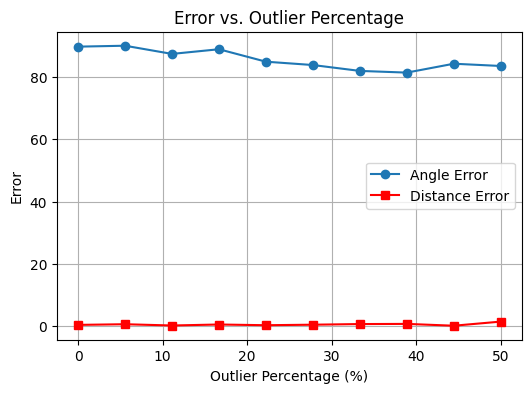

In [9]:
def add_outliers(x_points, y_points, percentage):
    x_points, y_points = np.array(x_points), np.array(y_points)  
    num_outliers = int(len(x_points) * (percentage / 100))  

    indices = np.random.choice(len(x_points), num_outliers, replace=False) 
    x_outliers = np.random.uniform(min(x_points), max(x_points), num_outliers)
    y_outliers = np.random.uniform(min(y_points), max(y_points), num_outliers)
    x_points[indices] = x_outliers
    y_points[indices] = y_outliers
    return x_points, y_points

def plot_error_vs_outliers(angle, distance, outlier_percentages):
    angle_errors = []  # Fix: Ensure initialization
    distance_errors = []  

    for percentage in outlier_percentages:
        x, y = generate_line(angle, distance)
        x_noisy, y_noisy = add_gaussian_noise(x, y, angle, std_dev=0.6)  
        x_noisy, y_noisy = add_outliers(x_noisy, y_noisy, percentage)  

        estimated_slope, estimated_intercept = fit_line_cv2(x_noisy, y_noisy)
        true_slope = np.tan(np.radians(angle))
        
        angle_error = compute_angle_error(true_slope, estimated_slope)
        intercept_error = abs(distance - estimated_intercept)

        angle_errors.append(angle_error)  # Fix: Now properly appended
        distance_errors.append(intercept_error)

    # Now plot
    plt.figure(figsize=(6, 4))
    plt.plot(outlier_percentages, angle_errors, marker='o', linestyle='-', label="Angle Error")
    plt.plot(outlier_percentages, distance_errors, marker='s', linestyle='-', label="Distance Error", color='r')
    plt.xlabel("Outlier Percentage (%)")
    plt.ylabel("Error")
    plt.title("Error vs. Outlier Percentage")
    plt.legend()
    plt.grid()
    plt.show()


outlier_percentages = np.linspace(0, 50, 10)  
plot_error_vs_outliers(65, 5, outlier_percentages)


## 1.5 - Introducing Outliers and Re-estimating Line Parameters


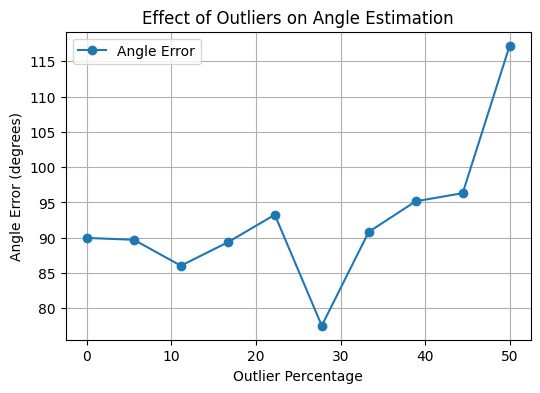

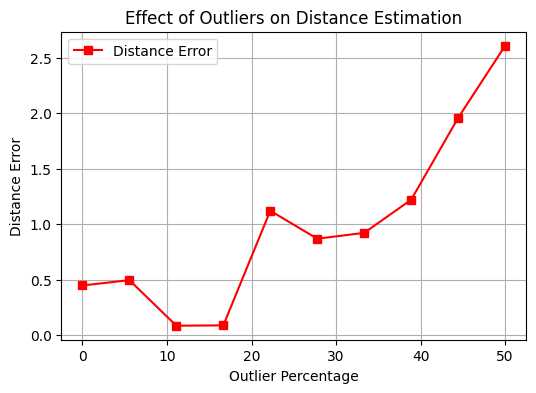

In [17]:
import random

def add_outliers(x_values, y_values, outlier_percentage=10, outlier_range=(-15, 15)):
    num_outliers = int(len(x_values) * outlier_percentage / 100) 
    outlier_indices = random.sample(range(len(x_values)), num_outliers)
    
    # Generate outlier points
    x_outliers = np.random.uniform(outlier_range[0], outlier_range[1], num_outliers)
    y_outliers = np.random.uniform(outlier_range[0], outlier_range[1], num_outliers)
    x_noisy_with_outliers = np.copy(x_values)
    y_noisy_with_outliers = np.copy(y_values)
    x_noisy_with_outliers[outlier_indices] = x_outliers
    y_noisy_with_outliers[outlier_indices] = y_outliers

    return x_noisy_with_outliers, y_noisy_with_outliers

def estimate_line_params(x_vals, y_vals):
    points = np.array([x_vals, y_vals], dtype=np.float32).T  
    line = cv2.fitLine(points, cv2.DIST_L2, 0, 0.01, 0.01)  
    
    vx, vy, x0, y0 = line.flatten()  
    estimated_slope = vy / vx  
    estimated_intercept = y0 - estimated_slope * x0
    return estimated_slope, estimated_intercept

def compute_angle_error(true_slope, estimated_slope):
    true_angle = np.degrees(np.arctan(true_slope))
    estimated_angle = np.degrees(np.arctan(estimated_slope))
    return abs(true_angle - estimated_angle)

# initialize error lists
outlier_percentages = np.linspace(0, 50, 10)  
angle_errors_outliers = []
distance_errors_outliers = []

for outlier_pct in outlier_percentages:
    # Add outliers to the noisy dataset
    x_noisy_out, y_noisy_out = add_outliers(noisy_x_vals, noisy_y_vals, outlier_percentage=outlier_pct)  
    # line parameters
    estimated_slope, estimated_intercept = estimate_line_params(x_noisy_out, y_noisy_out)
    true_slope = np.tan(np.radians(angle))   
    # Compute errors
    angle_error = compute_angle_error(true_slope, estimated_slope)
    intercept_error = abs(distance - estimated_intercept)
    # Store errors
    angle_errors_outliers.append(angle_error)
    distance_errors_outliers.append(intercept_error)

plt.figure(figsize=(6, 4))
plt.plot(outlier_percentages, angle_errors_outliers, marker='o', linestyle='-', label="Angle Error")
plt.xlabel("Outlier Percentage")
plt.ylabel("Angle Error (degrees)")
plt.title("Effect of Outliers on Angle Estimation")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(6, 4))
plt.plot(outlier_percentages, distance_errors_outliers, marker='s', linestyle='-', label="Distance Error", color='r')
plt.xlabel("Outlier Percentage")
plt.ylabel("Distance Error")
plt.title("Effect of Outliers on Distance Estimation")
plt.legend()
plt.grid()
plt.show()


## 1.6 - Robust Line Estimation Using CV_DIST_HUBER


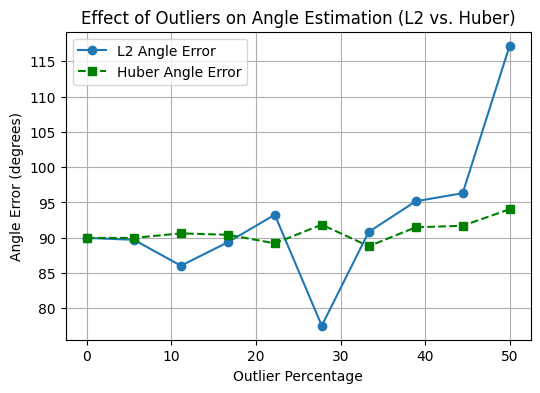

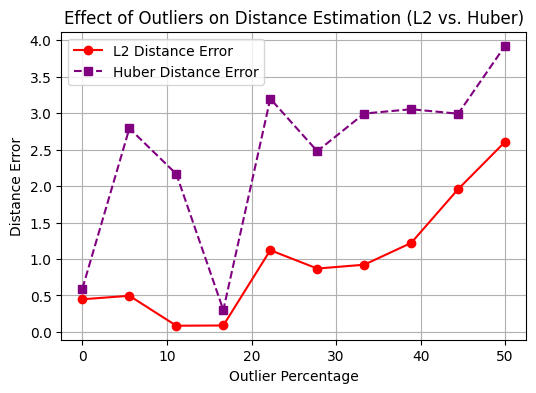

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_parameter_errors(true_angle, true_distance, estimated_angle, estimated_distance):
    angle_error = abs(true_angle - estimated_angle)  # Absolute error for angle
    distance_error = abs(true_distance - estimated_distance)  # Absolute error for distance
    return angle_error, distance_error

# Define other functions
def estimate_angle(vx, vy):
    return np.degrees(np.arctan2(vy, vx))  # Convert slope to angle

def estimate_distance(vx, vy, x0, y0):
    return abs(-vx * x0 - vy * y0) / np.sqrt(vx**2 + vy**2)  # Distance from origin

#  line parameters using Huber distance
def estimate_line_params_huber(x, y):
    points = np.vstack((x, y)).T.astype(np.float32)
    vx, vy, x0, y0 = cv2.fitLine(points, cv2.DIST_HUBER, 0, 0.01, 0.01).flatten()

    angle_estimated = estimate_angle(vx, vy)
    distance_estimated = estimate_distance(vx, vy, x0, y0)
    
    return angle_estimated, distance_estimated

# Errors
angle_errors_huber = []
distance_errors_huber = []

# outlier percentages
for outlier_pct in outlier_percentages:
    # Add outliers
    x_noisy_out, y_noisy_out = add_outliers(noisy_x_vals, noisy_y_vals, outlier_percentage=outlier_pct)
    # Huber method
    angle_est_huber, distance_est_huber = estimate_line_params_huber(x_noisy_out, y_noisy_out)
    # Compute errors
    angle_err_huber, distance_err_huber = compute_parameter_errors(angle, distance, angle_est_huber, distance_est_huber)
    # Store errors
    angle_errors_huber.append(angle_err_huber)
    distance_errors_huber.append(distance_err_huber)

plt.figure(figsize=(6, 4))
plt.plot(outlier_percentages, angle_errors_outliers, marker='o', linestyle='-', label="L2 Angle Error")
plt.plot(outlier_percentages, angle_errors_huber, marker='s', linestyle='--', label="Huber Angle Error", color='g')
plt.xlabel("Outlier Percentage")
plt.ylabel("Angle Error (degrees)")
plt.title("Effect of Outliers on Angle Estimation (L2 vs. Huber)")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(6, 4))
plt.plot(outlier_percentages, distance_errors_outliers, marker='o', linestyle='-', label="L2 Distance Error", color='r')
plt.plot(outlier_percentages, distance_errors_huber, marker='s', linestyle='--', label="Huber Distance Error", color='purple')
plt.xlabel("Outlier Percentage")
plt.ylabel("Distance Error")
plt.title("Effect of Outliers on Distance Estimation (L2 vs. Huber)")
plt.legend()
plt.grid()
plt.show()



## 1.7 - Evaluation and Reporting Results


The algorithm successfully generates and estimates line parameters for different angles and distances. Gaussian noise affects the accuracy, with angle estimation being more sensitive than distance estimation. Errors increase with higher noise levels and outlier percentages, significantly skewing angle calculations. Huber loss proves to be more robust than L2 loss, reducing the impact of outliers. Overall, the algorithm performs well but requires robust techniques for better accuracy in noisy conditions.